# Introduction

In [1]:
# Import all the Python Libraries needed for the Exploratory Data Analysis
import pandas as pd
import numpy as np
import json
from collections import Counter

import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from plotly.colors import n_colors

from IPython.core.display import display, HTML, Javascript 
import IPython.display
from IPython.display import display, clear_output

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/var/folders/hb/kx7m53393p7622hzv726f_mw0000gn/T/ipykernel_33318/3220142624.py:14: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [2]:
# Load the responses of the survey
df = pd.read_csv("./input/kaggle_survey_2022_responses.csv")

# Get the questions' titles
questions_titles =  df[0:1]

# Skip the first row as it keeps the questions' titles
df = df[1:]

In [3]:
# Helper Functions for creating the visualizations in Plotly. 
def create_scatter_plot(
    x_axis_values,
    y_axis_values, 
    hover_template,
    marker_color, 
    marker_size, 
    title,
    subtitle,
    subtitle_explain):
    """It creates a Scatter Plot."""
    
    # Define the trace
    trace = go.Scatter(
        x=x_axis_values, 
        y=y_axis_values,
        mode='markers', 
        hovertemplate=hover_template,
        marker=dict(
            color=marker_color,
            size=marker_size,
            showscale=True,
            colorbar=dict(title="Percent"),
            opacity=0.7,
            colorscale = 'RdBu_r'
        )
    )

    # Define the layout
    layout = go.Layout(
        width=900, 
        height=950, 
        plot_bgcolor="#fff", 
        paper_bgcolor="#fff", 
        showlegend = False, 
        title = {
            'text' : f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span><br><br><sup>{subtitle}</sup><br><sup>{subtitle_explain}</sup>", 
            'x':0.5,
            'xanchor': 'center'
        }, 
        font = {"color" : '#7b6b59'},
        margin = dict(t=170),
    )
    
    fig = go.Figure(data = [trace], layout = layout)
    
    fig.update_xaxes(
        showline=False,
        linewidth=1,
        linecolor='#c9c4c3',
        gridcolor='#c9c4c3',
        tickfont=dict(size=14, family='Verdana', color='#7b6b59'), 
        title="",
        title_font=dict(size=14, family='Verdana', color='#f57369'),
        showgrid=False, 
        tickangle=325
    )
    fig.update_yaxes(
        showline=False,
        linewidth=1,
        linecolor='#000',
        gridcolor='#fff',
        tickfont=dict(size=14, family='Verdana', color='#a43725'), 
        title="",
        title_font=dict(size=14, family='Verdana', color='#f57369'),
        showgrid=False
    )

    fig.show()

def get_bar_plot_trace(x_values, y_values, display_text, top_n, rest_n, hovertext, orientation="h"):
    """It creates the trace for a bar plot."""
    
    trace = go.Bar(
        y = y_values,
        x = x_values,
        name = "",
        orientation = orientation,
        marker = dict(color = ["#E6b6a4"]*rest_n +  ["#a43725"]*top_n),
        text = display_text,
        texttemplate =  "<b style='color: #fff'>%{text}% </b>",
        textposition = ["outside"]*rest_n + ["inside"]*top_n,
        hovertext=hovertext
    )
    
    return trace

def create_single_bar_plot(x_values, y_values, display_text, top_n, rest_n, hovertext, title, subtitle="", orientation="h"):
    """It creates single bar plots."""

    trace = get_bar_plot_trace(x_values, y_values, display_text, top_n, rest_n, hovertext, orientation)

    large_title_format = f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span>"
    
    layout = dict(
        title = large_title_format,
        font = dict(color = '#7b6b59'),
        margin = dict(t=120),
        yaxis={'categoryorder':'array','categoryarray': x_values},
        xaxis=dict(side="top", zerolinecolor = "#4d4d4d", zerolinewidth = 0.5, gridcolor="#e7e7e7", tickformat=",.1%"),
        width = 800,
        height= 700,
        plot_bgcolor = "white"
    )

    fig = go.Figure(data = trace, layout = layout)
    fig.show()
    
def create_box_plot(df, x_column_name, y_column_name, title):
    """It creates bar plots."""

    fig = px.box(
        df, 
        x=x_column_name, 
        y=y_column_name,
        title=f"<span style='font-size:30px; color:#7b6b59; font-family:Times New Roman'>{title}</span>")

    layout = go.Layout(
        xaxis= {"title": ""},
        yaxis= {"title": "Compensation in USD"},
        font = dict(color = 'black'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        height=800,
        width=1050
    )

    fig.update_layout(layout)
    fig.update_yaxes(showline=True, linewidth=1, gridcolor='lightgrey')
    fig.update_traces(marker_color='#b39a74')

    fig.show() 

def create_heatmap(z, x, y, annotation_text, color_scale, title, subtitle="", xlabel="", ylabel=""):
    """It creates a heatmap."""

    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=annotation_text,  colorscale=color_scale)

    large_title_format = f"<span style='font-size:30px; font-family:Times New Roman'>{title}</span>"
    small_title_format = f"<span style='font-size:14px; font-family:Helvetica'>{subtitle}</b></span>"


    layout = dict(
        title = large_title_format + "<br>" + small_title_format,
        font = dict(color = '#7b6b59'),
        xaxis= {"title": xlabel},
        yaxis= {"title": ylabel}
    )

    fig['layout'].update(layout)
    fig["layout"]["xaxis"].update(side="bottom")
    fig.show()

In [4]:
# This section has all the python functions and global variables needed for the analysis

# Categorizing the state of Machine Learning Adoption into more general categories
map_ml_adoption = {
    "No (we do not use ML methods)": "Not Started" , 
    "We are exploring ML methods (and may one day put a model into production)": "Exploration Stage",
    "We use ML methods for generating insights (but do not put working models into production)": "Generating Insights", 
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "Models in Production",
    "We have well established ML methods (i.e., models in production for more than 2 years)": "Models in Production",
    "I do not know": "Not Known",
    np.nan: "Not Known"
}


# Colors for different Machine Learning Adoption Stages
ml_adoption_color_discrete_map={
    "Models in Production":"#a43725", 
    "Generating Insights": "#c07156", 
    "Exploration Stage":"#E6b6a4",
    "Not Started": "#e0d5bd",
    "Not Known": "#beb29e"
}


# Rephrasing the ML Adoption (state) by adding numbers for sorting them alphabetically
map_ml_usage = {
    "No (we do not use ML methods)": "0. Not Started<br><sup>(No ML)</sup>" , 
    "We are exploring ML methods (and may one day put a model into production)": "1. Exploration<br><sup>Only Exploring ML</sup>",
    "We use ML methods for generating insights (but do not put working models into production)": "2. Beginner Stage<br><sup>Use ML only for Insights</sup>", 
    "We recently started using ML methods (i.e., models in production for less than 2 years)": "3. Intermediate Stage<br><sup>Recently Started Using ML</sup>",
    "We have well established ML methods (i.e., models in production for more than 2 years)": "4. Advance Stage<br><sup>Well Established ML</sup>",
    "I do not know": "Not Known",
    np.nan: "Not Known"   
}


# Rephrasing the Company Size by adding numbers for sorting them alphabetically
map_company_size = {
    "0-49 employees": "1. 0-49 employees" , 
    "50-249 employees": "2. 50-249 employees",
    "250-999 employees": "3. 250-999 employees",
    "1000-9,999 employees": "4. 1000-9,999 employees",
    "10,000 or more employees": "5. 10,000 or more employees",
    np.nan: np.nan   
}


# Rephrasing the Coding experience by adding numbers for sorting them alphabetically
map_programming_experience = {
    "I have never written code": "1. 0 years",
    "< 1 years": "2. < 1 years",
    "1-3 years": "3. 1-3 years",
    "3-5 years": "4. 3-5 years",
    "5-10 years": "5. 5-10 years",
    "10-20 years": "6. 10-20 years",
    "20+ years": "7. 20+ years",
    np.nan: np.nan
}


# Rephrasing the Machine Learning experience by adding numbers for sorting them alphabetically
map_ml_experience = {
    "I do not use machine learning methods": "1. 0 years",
    "Under 1 year": "2. < 1 years",
    "1-2 years": "3. 1-2 years",
    "2-3 years": "4. 2-3 years",
    "3-4 years": "5. 3-4 years",
    "4-5 years": "6. 4-5 years",
    "5-10 years": "7. 5-10 years",
    "10-20 years": "8. 10-20 years",
    "20+ years": "9. 20+ years",
    np.nan: np.nan
}


# Rephrasing the Data Science Teams Size by adding numbers for sorting them alphabetically
map_data_team_size = {
    "0": "1. 0",
    "1-2": "2. 1-2",
    "3-4": "3. 3-4",
    "5-9": "4. 5-9",
    "10-14": "5. 10-14",
    "15-19": "6. 15-19",
    "20+": "7. 20+",
    np.nan: np.nan
}


# Get a plotly Dataset with all the countries along with the continent in which they belong
countries_df = px.data.gapminder().query("year == 2007")
countries_df["country"] = countries_df["country"].str.strip()

map_country_continent = {
    "United States of America": "Americas", 
    "United Kingdom of Great Britain and Northern Ireland": "Europe",
    "South Korea": "Asia", 
    "Russia": "Europe",
    "Viet Nam": "Asia",
    "Hong Kong (S.A.R.)": "Asia",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "Iran, Islamic Republic of...": "Asia",
    
}


def fix_map_country_continent(map_countries: dict, country:str, continent:str):
    """It maps a country to its continent"""
    if country in map_countries:
        return map_countries[country]
    
    return continent


def usage_of_a_product_or_service(question_title: str, row: pd.Series, columns_list: list) -> str:
    """It takes as input a question title with multiple choices answers and checks
    if the respondent has selected at least one of the answers or not. 
    For instance, if we want to check if a respondent uses cloud computing platforms, question 31, then we should 
    check if the participant has selected any cloud computing platform choice Q31_1, Q31_2, etc. 
    """
    for col in columns_list:
        if col.startswith(question_title):

            if not pd.isnull(row[col]) and row[col].strip().lower() != "none":
                return "Yes"
    # If all the columns (choices), Q31_1, Q31_2, etc have empty values then the user hasn't selected 
    # any platform so we return NO as the answer
    return "No"


def categorize_education(education:str) -> str:
    """Assigns more general categories to education levels."""
    if education in [
        "No formal education past high school", 
        "Some college/university study without earning a bachelor’s degree"
    ]:
        return "Lower than Bachelor"
    
    if education == "Bachelor’s degree":
        return "Bachelor"
    
    if education == "Master’s degree":
        return "Master"
    
    if education in ["Doctoral degree", "Professional doctorate"]:
        return "Higher than Master"
    
    return "Other"


def extract_and_count_all_the_multiple_choice_answers(question, df):
    """If we have a question with multiple choices it returns a data
    frame with the number of occurrences of each choice in the responses. 
    """
    
    # e.g List of choices for Question, e.g. Q19 (computer vision methods)
    choices_list = [choice for choice in df.columns if choice.startswith(question)]
    dfs_list = []
    for col in choices_list:
        dfs_list.append(df.groupby([col]).agg({"Q2" : "count"}).reset_index().rename(columns={col: question, "Q2": "counts"}))

    agg_df = pd.concat(dfs_list)
    agg_df["relative_percent"] = agg_df.apply(lambda x : (x["counts"] / df.shape[0]), axis = 1)
    agg_df = agg_df.sort_values(by=["relative_percent"], ascending=True)
    
    return agg_df


def assign_label(service:str):
    """It returns the company name to which the product belongs. 
    It takes care only of the 3 big techs: Google, Microsoft, Amazon.
    """
    
    if "google" in service.lower():
        return "Google"
    
    if "aws" in service.lower() or "amazon" in service.lower():
        return "Amazon"
    
    if "azure" in service.lower() or "microsoft" in service.lower():
        return "Microsoft"
    
    if "ibm" in service.lower():
        return "IBM"

    return "Other"


def extract_the_number_of_responses(question_title: str, row: pd.Series, columns_list: list) -> str:
    """It takes as input an answer from a multiple-choice question and counts the number 
    of respondents that have chosen it.
    """
    num_responses = 0 
    for col in columns_list:
        if col.startswith(question_title):
            if not pd.isnull(row[col]):
                num_responses = num_responses + 1 

    return num_responses


def wrap_df_text(df):
    return display(HTML(df.style.background_gradient(axis=0,  cmap='YlOrBr', subset=["Average number of selected choices"]).to_html().replace("\\n","<br>")))


In [5]:
# respondents that currently are not students (answer **No** the **Q5** question)
# currently are employed (They didn't answer the **Q23** question that "Currently not employed")
# have answered in what industry they are currently employed (or their most recent employer if retired) - **Q24 question has an answer**

scope_df = df[
    (df["Q5"] == "No") & 
    (df["Q24"].notnull()) &
    (df["Q23"] != "Currently not employed")
]


# Assign more general categories to the state of Machine Learning Adoption in industry
scope_df["ML_adoption_class"] = scope_df["Q27"].apply(lambda x : map_ml_adoption[x])

# Rephrasing the ML Adoption (state) by adding numbers for sorting them alphabetically
scope_df["ML_adoption"] = scope_df["Q27"].apply(lambda x : map_ml_usage[x])

# Rephrasing the size of the company by adding numbers for sorting them alphabetically
scope_df["Q25"] = scope_df["Q25"].apply(lambda x : map_company_size[x])

# Check if the respondent used Cloud Computing Platforms
scope_df["Cloud_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q31", row, list(scope_df.columns)), axis=1)
scope_df["NLP_methods_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q20", row, list(scope_df.columns)), axis=1)
scope_df["CV_methods_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q19", row, list(scope_df.columns)), axis=1)
scope_df["GPU_usage"] = scope_df.apply(lambda row: usage_of_a_product_or_service("Q42", row, list(scope_df.columns)), axis=1)


scope_df["Q11"] = scope_df["Q11"].apply(lambda x : map_programming_experience[x])
scope_df["Q16"] = scope_df["Q16"].apply(lambda x : map_ml_experience[x])
scope_df["Q26"] = scope_df["Q26"].apply(lambda x : map_data_team_size[x])

industry_totals = scope_df["Q24"].value_counts().to_dict()

## Adoption of Data Science and Machine Learning in Industry

As a Data Scientist in the banking sector, I strongly believe that the adoption of Data Science and Machine Learning could transform older, traditional banks into more digitally savvy banks capable of competing with the rise of more digitally-driven ones of the modern age. AI adoption can benefit other industries as well. The findings from the latest [McKinsey Global Survey](https://www.mckinsey.com/capabilities/quantumblack/our-insights/global-survey-the-state-of-ai-in-2021) about the state of AI in 2021 indicate that AI adoption continues to grow and that the benefits remain significant. A majority of McKinsey survey respondents now say their organizations have adopted AI capabilities, as AI’s impact on the bottom line is growing.

However, operationalizing and scaling machine learning to drive business value can be challenging. My experience has shown that, while many businesses have started diving into it, only a few data science projects actually make it to production. Moving from the experiment phase of ML to real-world deployment is difficult, as the journey requires finetuning ML models to fit the practical needs of a business and ensuring the solution can be implemented at scale.

**ML Operationalization:**

<img width="790" alt="image" style="display: block; margin: 0 auto" src="https://user-images.githubusercontent.com/28102493/198541622-0a50ee53-3e53-4d7d-acef-5106d6ccbe70.png">
<div style="text-align: center;">Source Nvidia Blog: <a href="https://blogs.nvidia.com/blog/2020/09/03/what-is-mlops/ ">What Is MLOps?</a></div>

Models as part of an experiment are good, but models in production are great. MLOps, as the name implies, brings operationalization to the table, providing resources for bringing models from test environments into production. 

## Analysis's Target

The goal of this notebook is to extract insights from the responses of [2022 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2022) 
about the state of AI Adoption and ML Operationalization in the industry in 2022 as well as about the Data Science landscape in the market. As I'm curious to see how the MLOps and AI adoption progressing in other organizations and what's the current trends in Data Science I'll try to enlighten the following main topics:

1. **What's the state of Machine Learning adoption in the enterprise today?** 
    - What's the percentage of enterprises deploying data science and machine learning in production today? 
    - Does the company's size or sector play a role in AI Adoption? Are larger companies more likely than smaller companies to have deployed AI in their organization?

1. **What's the enterprise AI tech stack?** The modern AI stack is a collection of tools, services, and processes imbibed with MLOps practices that allow developers and operations teams to build ML pipelines efficiently in terms of resource utilization, team efforts, end-user experience, and maintenance activities. It would be interesting if, for instance, we would answer the following questions:
    - Are Cloud-native solutions a must-have for business today?
    - What are the most popular tools for Data Storage, Data Management, AutoML, Business Intelligence, etc.?
    - What frameworks and libraries are commonly used in the market for Machine Learning and Data Science?
    - Are transfer learning methods mature enough to be used in the business environment?
    - Do we really work with big data and deep learning methods to such an extent that we need specialized hardware for ML models training?

1. **AI Careers & Job Outlook in 2022:**
    - What are the top AI job positions?
    - What does an AI professional do?
    - What are the professional AI skills in demand for 2022?

1. **AI Salary Overview**

## Methodology

In order to have as much as I can a representative dataset for the analysis, I'll keep in the dataset only the professionals, namely the respondents that fulfill the criteria listed below:

- currently are not students (answer **No** the **Q5** question)
- currently are employed (They didn't answer "Currently not employed" to the **Q23** question)
- have answered in what industry they are currently employed (or their most recent employer if retired) - **Q24 question has an answer, not None**

As it can be seen below, ~ **37.9% of the total responses** meet the above criteria and the analysis will be conducted based on these responses.

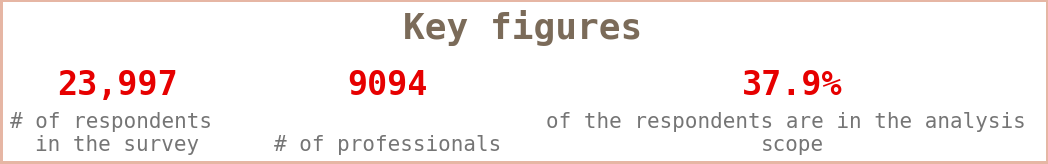

In [6]:
mpl.rcParams.update(mpl.rcParamsDefault)

fig1 = plt.figure(figsize=(5,2),facecolor='white')

ax1 = fig1.add_subplot(1,1,1)
font = 'monospace'
ax1.text(0.9, 0.8, "Key figures",color='#7b6b59',fontsize=26, fontweight='bold', fontfamily=font, ha='center')


ax1.text(0, 0.4, "{:,d}".format(df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(0, 0.001, "# of respondents \nin the survey",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax1.text(0.6, 0.4, "{}".format(scope_df.shape[0]), color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(0.6, 0.001, "# of professionals",color='#757575',fontsize=15, fontweight='light', fontfamily=font,ha='center')


ax1.text(1.5, 0.4, "{}".format(round((scope_df.shape[0]/df.shape[0] )*100, 2))+"%", color='#e60000', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax1.text(1.5, 0.001, "of the respondents are in the analysis \nscope",color='#757575',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax1.set_yticklabels('')
ax1.tick_params(axis='y',length=0)
ax1.tick_params(axis='x',length=0)
ax1.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax1.spines[direction].set_visible(False)

fig1.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig1.patch.set_linewidth(3)
fig1.patch.set_edgecolor('#E6b6a4')
fig1.patch.set_facecolor('white')
ax1.set_facecolor('white')
    
plt.show()

## Outlier Analysis

It would be also interesting to examine if there are some **"outlier respondents"** that have marked all the answers for the multiple-choice questions. 

For that, I calculated the average number of choices that each respondent selected in the multiple-choice questions. I found out that each respondent selects 1 - 2 options in the multiple-choice questions on average. 


Only 2% of the respondents in the scope have an average number of selections greater than 3, which cannot affect the results of the analysis. **Also, it doesn't necessarily mean that we have to address them as outliers. One explanation would be that they might have many years of coding or ML experience, so makes sense to be familiar with many frameworks and work with a variety of libraries.** 

As the tables below illustrate, this hypothesis is valid since the biggest percentage of the respondents with more than 3 selections on average, have strong coding and machine learning experience. 

So I won't discard these respondents or treat them differently. 

In [7]:
# Collect all the multiple-choice questions
multiple_choice_questions = {}
seen_columns = []

for col in df.columns:
    question = col.split("_")[0]
    if question in seen_columns:
        if question not in multiple_choice_questions:
            multiple_choice_questions[question] = 2
        else: 
            multiple_choice_questions[question] = multiple_choice_questions[question] + 1
    else:
        seen_columns.append(question)

# Create a new column in the dataframe for each of the multiple-choice questions which
# shows the number of the choices that the respondent selected for each one respectively.
for col in list(multiple_choice_questions.keys()):
    scope_df[f"{col}_number_of_responses"] = scope_df.apply(
        lambda x : extract_the_number_of_responses(col,x, df.columns), axis = 1)
    

In [8]:
respondents_mean_responses = scope_df[[f"{col}_number_of_responses" for col in list(multiple_choice_questions.keys())]].mean(axis = 1).reset_index().rename(columns={0: "Mean number of responses"})
#respondents_mean_responses["Mean number of responses"].mean()
# (respondents_mean_responses[
#     respondents_mean_responses["Mean number of responses"] > 3
# ].shape[0]/scope_df.shape[0])*100

outliers = scope_df.filter(items=respondents_mean_responses[respondents_mean_responses["Mean number of responses"] > 3]["index"].to_list(), axis=0)
outliers = outliers.groupby(
    ["Q16"]
).agg(
    {"Q2" : "count"}
).reset_index().rename(
    columns={"Q2": "Nbr of respondents", "Q16": "Years of Machine Learning Experience"}
).sort_values(by=["Years of Machine Learning Experience"])
outliers["%"] = outliers.apply(lambda x : x["Nbr of respondents"] / outliers["Nbr of respondents"].sum(), axis = 1)
outliers["%"] = np.round(outliers["%"]* 100, 2)
outliers.style.background_gradient(axis=0,  cmap='YlOrBr', subset=["%"])

,Years of Machine Learning Experience,Nbr of respondents,%
0,2. < 1 years,11,6.400000
1,3. 1-2 years,28,16.280000
2,4. 2-3 years,32,18.600000
3,5. 3-4 years,23,13.370000
4,6. 4-5 years,24,13.950000
5,7. 5-10 years,43,25.000000
6,8. 10-20 years,11,6.400000


In [9]:
outliers = scope_df.filter(items=respondents_mean_responses[respondents_mean_responses["Mean number of responses"] > 3]["index"].to_list(), axis=0)
outliers = outliers.groupby(
    ["Q11"]
).agg(
    {"Q2" : "count"}
).reset_index().rename(
    columns={"Q2": "Nbr of respondents", "Q11": "Years of Coding Experience"}
).sort_values(by=["Years of Coding Experience"])
outliers["%"] = outliers.apply(lambda x : x["Nbr of respondents"] / outliers["Nbr of respondents"].sum(), axis = 1)
outliers["%"] = np.round(outliers["%"]* 100, 2)
outliers.style.background_gradient(axis=0,  cmap='YlOrBr', subset=["%"])

,Years of Coding Experience,Nbr of respondents,%
0,2. < 1 years,10,5.810000
1,3. 1-3 years,31,18.020000
2,4. 3-5 years,25,14.530000
3,5. 5-10 years,45,26.160000
4,6. 10-20 years,36,20.930000
5,7. 20+ years,25,14.530000


In the table below, we can also see the average number of choices that respondents selected for each of the multiple-choice questions and we might be able to conclude the following findings:

- The professionals who participated in the survey, use on average 2 programming languages on a regular basis, 3 Machine Learning Algorithms, and 2 Machine Learning Frameworks.
- In addition, they usually don't use natural language processing (NLP) methods like Word embeddings/vectors (GLoVe, fastText, word2vec), Encoder-decoder models (seq2seq, vanilla transformers), Contextualized embeddings, or Transformer language models (seq2seq, vanilla transformers), Contextualized embeddings, or Transformer language modelsIn the table below, we can also see the average number of choices that respondents selected for each of the multiple-choice questions and we might be able to conclude the following findings:

In [10]:
outlier_analysis = []

for col in list(multiple_choice_questions.keys()):
    mean_responses = round(scope_df[f"{col}_number_of_responses"].mean())
    outlier_analysis.append([
        col,
        multiple_choice_questions[col], 
        mean_responses,
    ])
    
average_responses = pd.DataFrame(outlier_analysis, columns = ["Question", "Nbr of available Choices", "Average number of selected choices"])
average_responses["Question Title"] = questions_titles[[f"{col}_1" for col in list(multiple_choice_questions.keys())]].loc[0].to_list()
average_responses["Question Title"] = average_responses["Question Title"].apply(lambda x : x.split("(Select")[0].strip())

#Updates the DataFrame in place
scope_df.drop([f"{col}_number_of_responses" for col in list(multiple_choice_questions.keys())], axis = 1, inplace=True)

average_responses["Question Title"] = average_responses['Question Title'].str.wrap(80)
average_responses = average_responses[["Question", "Question Title", "Nbr of available Choices", "Average number of selected choices"]]
wrap_df_text(average_responses)

,Question,Question Title,Nbr of available Choices,Average number of selected choices
0,Q6,On which platforms have you begun or completed data science courses?,12,2
1,Q7,What products or platforms did you find to be most helpful when you first started studying data science?,7,2
2,Q10,"Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)",3,0
3,Q12,What programming languages do you use on a regular basis?,15,2
4,Q13,Which of the following integrated development environments (IDE's) do you use on a regular basis?,14,3
5,Q14,Do you use any of the following hosted notebook products?,16,1
6,Q15,Do you use any of the following data visualization libraries on a regular basis?,15,2
7,Q17,Which of the following machine learning frameworks do you use on a regular basis?,15,2
8,Q18,Which of the following ML algorithms do you use on a regular basis?,14,3
9,Q19,Which categories of computer vision methods do you use on a regular basis?,8,1
